<a href="https://colab.research.google.com/github/filnels/Homeworks/blob/main/Classification_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten, LSTM, SimpleRNN, GRU, SpatialDropout1D,Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# загружаем данные

In [ ]:
max_words=10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [ ]:
#Подготовим данные для обучения, заполним нулями, чтобы одинаковая длина была для каждого отзыва

In [ ]:
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
# Создаем небронную сеть LSTM

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 8, input_length=maxlen))
model.add(LSTM(32, recurrent_dropout = 0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#компилируем

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Обучаем

In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 26s 127ms/step - accuracy: 0.5945 - loss: 0.6672 - val_accuracy: 0.7280 - val_loss: 0.6490
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 42s 133ms/step - accuracy: 0.8038 - loss: 0.4514 - val_accuracy: 0.7992 - val_loss: 0.4351
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 41s 133ms/step - accuracy: 0.8398 - loss: 0.3754 - val_accuracy: 0.8228 - val_loss: 0.4037
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 41s 131ms/step - accuracy: 0.8787 - loss: 0.3049 - val_accuracy: 0.8432 - val_loss: 0.3878
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 23s 129ms/step - accuracy: 0.8960 - loss: 0.2692 - val_accuracy: 0.8068 - val_loss: 0.4637


In [ ]:
#Видим, что с увеличением эпох точность на обучающей выборке растет, но на валидацинной до 4 эпохи рост, но
#потом снижается, т.е. мы видим переобучение модели

In [ ]:
#Посмотрим на графике как проходит обучение

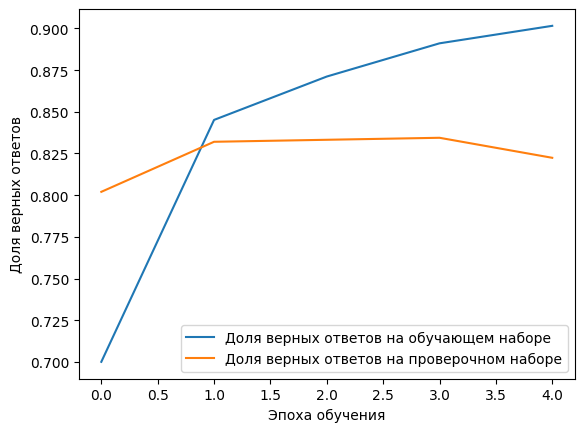

In [ ]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
#Проверим на тестовом наборе

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8216 - loss: 0.4099


In [ ]:
# Видим на тестовом наборе еще меньшую точность

In [ ]:
num_words=10000
maxlen=200

modelLSTM = Sequential()
modelLSTM.add(Embedding(num_words, 50, input_length=maxlen))
modelLSTM.add(SpatialDropout1D(0.4))
modelLSTM.add(LSTM(8, dropout=0.2, recurrent_dropout=0.2))
modelLSTM.add(Dense(1, activation='sigmoid'))

modelLSTM.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
history = modelLSTM.fit(x_train,
                    y_train,
                    epochs=2,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/2
704/704 ━━━━━━━━━━━━━━━━━━━━ 72s 99ms/step - accuracy: 0.6528 - loss: 0.6279 - val_accuracy: 0.7904 - val_loss: 0.4601
Epoch 2/2
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.8152 - loss: 0.4242 - val_accuracy: 0.8056 - val_loss: 0.4180


In [ ]:
plt.plot(history.history['acc'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
#видим, что результаты оказались лучще на первой модели, хотя она проще. Скорей всего так как мы обрезаем данные
#вторая модель не использует своих преимуществ

In [ ]:
#применим нейросеть GRU

In [ ]:
num_words=10000
maxlen=200

model = Sequential()
model.add(Embedding(max_words, 8, input_length=maxlen))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 29s 167ms/step - accuracy: 0.7956 - loss: 0.4540 - val_accuracy: 0.8544 - val_loss: 0.3417
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 28s 161ms/step - accuracy: 0.8997 - loss: 0.2553 - val_accuracy: 0.8764 - val_loss: 0.3115
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 42s 170ms/step - accuracy: 0.9295 - loss: 0.1895 - val_accuracy: 0.8772 - val_loss: 0.3227
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 40s 166ms/step - accuracy: 0.9461 - loss: 0.1499 - val_accuracy: 0.8760 - val_loss: 0.3430
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 29s 164ms/step - accuracy: 0.9566 - loss: 0.1298 - val_accuracy: 0.8556 - val_loss: 0.3801


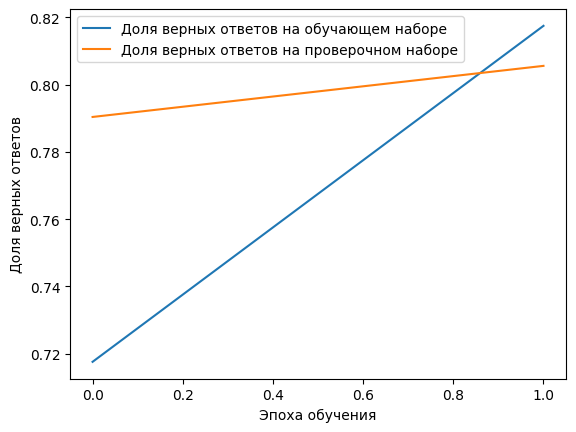

In [ ]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
#также видим переобучение. Точность получилась выше, чем LSTM

In [ ]:
modelGRU = Sequential()
modelGRU.add(Embedding(num_words, 50, input_length=maxlen))
modelGRU.add(SpatialDropout1D(0.4))
modelGRU.add(GRU(8, dropout = 0.2, recurrent_dropout = 0.2))
modelGRU.add(Dense(1, activation='sigmoid'))

modelGRU.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = modelGRU.fit(x_train,
                    y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 85s 116ms/step - accuracy: 0.6264 - loss: 5334716928.0000 - val_accuracy: 0.7016 - val_loss: 0.5726
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 80s 113ms/step - accuracy: 0.7866 - loss: 6400270336.0000 - val_accuracy: 0.7164 - val_loss: 0.5507
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 83s 115ms/step - accuracy: 0.8019 - loss: 13323643.0000 - val_accuracy: 0.7108 - val_loss: 0.5488
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 83s 117ms/step - accuracy: 0.8068 - loss: 4277510.5000 - val_accuracy: 0.7152 - val_loss: 0.5427
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 115ms/step - accuracy: 0.8105 - loss: 339453214720.0000 - val_accuracy: 0.7184 - val_loss: 0.5404


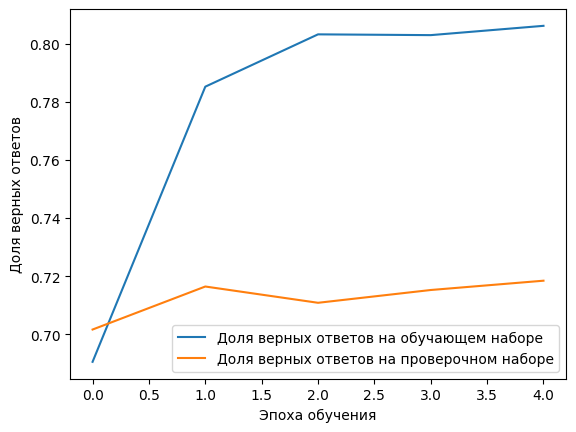

In [ ]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8550 - loss: 0.3903


In [ ]:
# на валидационных данных видим неплохую точность

In [ ]:
#SIMPLE RNN

In [ ]:
modelSRNN = Sequential()
modelSRNN.add(Embedding(num_words, 50, input_length=maxlen))
modelSRNN.add(SimpleRNN(8))
modelSRNN.add(Dense(1, activation='sigmoid'))

modelSRNN.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = modelSRNN.fit(x_train,
                    y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.6722 - loss: 0.6048 - val_accuracy: 0.8344 - val_loss: 0.3966
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.8622 - loss: 0.3470 - val_accuracy: 0.8396 - val_loss: 0.3774
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.8908 - loss: 0.2773 - val_accuracy: 0.8508 - val_loss: 0.3546
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 40s 55ms/step - accuracy: 0.9076 - loss: 0.2451 - val_accuracy: 0.8500 - val_loss: 0.3880
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9223 - loss: 0.2094 - val_accuracy: 0.8676 - val_loss: 0.3507


In [ ]:
#разобьм данные 80 на 20

In [ ]:
import numpy as np
from keras.datasets import imdb
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

In [ ]:
def vectorize(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


data = vectorize(data)
targets = np.array(targets).astype("float32")

In [ ]:
test_x = data[:10000]
test_y = targets[:10000]

In [ ]:
train_x = data[10000:]
train_y = targets[10000:]

In [ ]:
modelSRNN = Sequential()
modelSRNN.add(Embedding(10000, 50, input_length=10000))
modelSRNN.add(SimpleRNN(8))
modelSRNN.add(Dense(1, activation='sigmoid'))

modelSRNN.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
history = modelSRNN.fit(train_x,
                    train_y,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/5
   1/1125 ━━━━━━━━━━━━━━━━━━━━ 5:02:15 16s/step - accuracy: 0.3750 - loss: 0.7344

KeyboardInterrupt: 

In [ ]:
# к сожалению мощностей моего компьютера недостаточно, чтоб посчитать для рекурентной нейронной сети для векторов длиной 10000,
#посмотрим на простой модели с DENSE слоями, как повлияет изменение этих параметров

In [ ]:
# Input - Layer
from tensorflow.keras import models, layers
model = models.Sequential()

model.add(layers.Input(shape=(10000,)))
model.add(layers.Dense(50, activation="relu"))

In [ ]:
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))

In [ ]:
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 50)                  │         500,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 505,201 (1.93 MB)

 Trainable params: 505,201 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [ ]:
hystory = model.fit(
 train_x, train_y,
 epochs= 4,
 batch_size = 500,
 validation_data = (test_x, test_y)
)

Epoch 1/4
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.7331 - loss: 0.5219 - val_accuracy: 0.8932 - val_loss: 0.2600
Epoch 2/4
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.9195 - loss: 0.2129 - val_accuracy: 0.8967 - val_loss: 0.2665
Epoch 3/4
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9464 - loss: 0.1464 - val_accuracy: 0.8914 - val_loss: 0.2895
Epoch 4/4
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9670 - loss: 0.0981 - val_accuracy: 0.8865 - val_loss: 0.3397


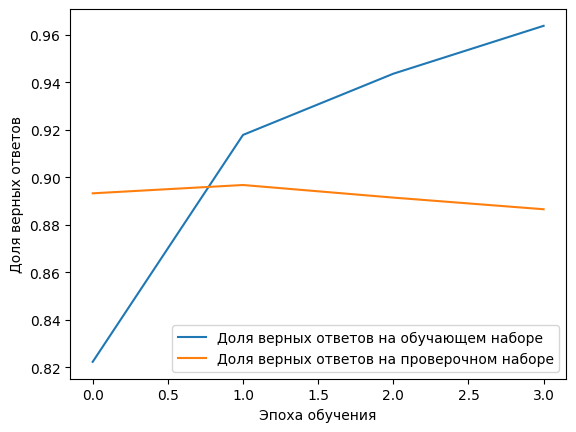

In [ ]:
plt.plot(hystory.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(hystory.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
scores = model.evaluate(test_x, test_y, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8883 - loss: 0.3313


In [ ]:
# Таким образом данная модль показала лучший результат на валидационных и тестовых данных,но она также склонна к переобучению
#для этих данных видимо важно учитывать длину отзывов